<a href="https://colab.research.google.com/github/zibro011/DataScience-Lab3/blob/main/ZibrowskiLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INET 4061 Lab 3** <br>
**Adelaide Zibrowski** <br>
**September 26, 2021**


# Overview
The purpose of this lab is to understand how age and race statistically relate to each other in terms of voting using fabricated data (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html). This will help us understand what, if any, relationship there is between ages among different races of voters. The null hypothesis is that there is no significant difference between group means, and the alternative hypothesis is that there is a significant difference between group means. We will decide whether to reject the null hypothesis using the one-way ANOVA test, T-test and Tukey Test. These tests are all used in statistics and data analysis to determine whether there are any statistically significant differences between the means of three or more groups. In this case, we have five groups: Asian, Black, Hispanic, Other, and White. We will be using the three tests to determine whether the mean age of voters is the same or different among the five races that we specified. When performing a one-way ANOVA analysis we must assume the following: each sample is taken from a normal distribution, each sample is taken independently of the other samples, the variance of data in each group should be equal, and the dependent variable is continuous (https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553 ).The results of a one-way ANOVA test are reported using the F-value and the corresponding p-value. The F-value, also known as F-statistic, is the number that is used to determine whether the difference between the means is statistically significant. The F-test reveals whether the variability between group means is larger than that of the observations within each group.

Sources that are used and cited later in this report include: <br>
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html <br>
 https://www.youtube.com/watch?v=-o3AxdVcUtQ&t=522s&ab_channel=edureka%21 <br>
 https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 

# Data
Our data was generated using code from http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html 

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
# Create DataSet 1
np.random.seed(12)

races1 =   ["asian1","black1","hispanic1","other1","white1"]

# Generate random data
voter_race_01 = np.random.choice(a= races1,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age_01 = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame_01 = pd.DataFrame({"race":voter_race_01,"age":voter_age_01})
groups_01 = voter_frame_01.groupby("race").groups

# Extract individual groups
asian1 = voter_age_01[groups_01["asian1"]]
black1 = voter_age_01[groups_01["black1"]]
hispanic1 = voter_age_01[groups_01["hispanic1"]]
other1 = voter_age_01[groups_01["other1"]]
white1 = voter_age_01[groups_01["white1"]]

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [ ]:
#Create DataSet 2
np.random.seed(12)

races2 =   ["asian2","black2","hispanic2","other2","white2"]

# Generate random data
voter_race_02 = np.random.choice(a= races2,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age_02 = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age_02 = np.where(voter_race_02=="white2", white_ages, voter_age_02)

# Group age data by race
voter_frame_02 = pd.DataFrame({"race":voter_race_02,"age":voter_age_02})
groups_02 = voter_frame_02.groupby("race").groups   

# Extract individual groups
asian2 = voter_age_02[groups_02["asian2"]]
black2 = voter_age_02[groups_02["black2"]]
hispanic2 = voter_age_02[groups_02["hispanic2"]]
other2 = voter_age_02[groups_02["other2"]]
white2 = voter_age_02[groups_02["white2"]]

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

# Exploratory Data Analysis (EDA)
The following Exploratory Data Analyis was performed with guidance and information from: https://www.youtube.com/watch?v=-o3AxdVcUtQ&t=522s&ab_channel=edureka%21

## Understand the Data

### Data Set 1

In [ ]:
#see first 5 rows
voter_frame_01.head()


,race,age
0,black1,51
1,white1,49
2,hispanic1,51
3,white1,48
4,asian1,56


In [ ]:
#see last 5 rows
voter_frame_01.tail()

,race,age
995,white1,47
996,asian1,40
997,white1,50
998,white1,51
999,hispanic1,43


In [ ]:
#see how many rows and columns are in the dataset
voter_frame_01.shape

(1000, 2)

In [ ]:
#see how many unique races and ages there are in the dataset
voter_frame_01.nunique()

race     5
age     31
dtype: int64

In [ ]:
#see what the race values are
voter_frame_01['race'].unique()

array(['black1', 'white1', 'hispanic1', 'asian1', 'other1'], dtype=object)

In [ ]:
#get dataset attributes
voter_frame_01.describe()

,age
count,1000.000000
mean,47.773000
std,5.308074
min,34.000000
25%,44.000000
50%,48.000000
75%,51.000000
max,66.000000


### Data Set 2

In [ ]:
#see first 5 rows
voter_frame_02.head()


,race,age
0,black2,54
1,white2,51
2,hispanic2,53
3,white2,50
4,asian2,51


In [ ]:
#see last 5 rows
voter_frame_02.tail()

,race,age
995,white2,51
996,asian2,45
997,white2,51
998,white2,45
999,hispanic2,56


In [ ]:
#see how many rows and columns are in the dataset
voter_frame_02.shape

(1000, 2)

In [ ]:
#see how many unique races and ages there are in the dataset
voter_frame_02.nunique()

race     5
age     36
dtype: int64

In [ ]:
#see what the race values are
voter_frame_02['race'].unique()

array(['black2', 'white2', 'hispanic2', 'asian2', 'other2'], dtype=object)

In [ ]:
#get dataset attributes
voter_frame_02.describe()

,age
count,1000.00000
mean,49.14100
std,5.72205
min,29.00000
25%,45.00000
50%,49.00000
75%,53.00000
max,72.00000


From the above code, we can see that we have two datasets, each with 1000 rows and two columns, one column being race and the other being age. There are 5 unique race values (black, white, hispanic, asian, and other) and 36 unique age values. We also get the metrics for age because that is the only quantitative variable in our dataset. 

## Clean the Data

### Data Set 1

In [ ]:
#check for null values
voter_frame_01.isnull().sum()

race    0
age     0
dtype: int64

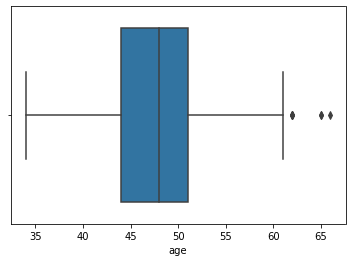

In [ ]:
#check for outliers using boxplot
sns.boxplot(x=voter_frame_01['age'])

In [ ]:
#get IQR values
Q1_01 = voter_frame_01.quantile(0.25)
Q3_01 = voter_frame_01.quantile(0.75)
IQR_01 = Q3_01 - Q1_01
print(Q1_01)
print(Q3_01)
print(IQR_01)

age    44.0
Name: 0.25, dtype: float64
age    51.0
Name: 0.75, dtype: float64
age    7.0
dtype: float64


In [ ]:
voter_frame_01.loc[voter_frame_01['age'] > 61]

,race,age
35,white1,62
235,hispanic1,65
361,hispanic1,65
543,white1,62
682,hispanic1,62
793,hispanic1,66
966,hispanic1,62


In [ ]:
voter_frame_01.loc[voter_frame_01['age'] < 34]

,race,age


In [ ]:
#eliminate values that fall outside the IQR values
voter_frame_01 = voter_frame_01[~((voter_frame_01 < (Q1_01 - 1.5 * IQR_01)) |(voter_frame_01 > (Q3_01 + 1.5 * IQR_01))).any(axis=1)]
voter_frame_01.shape

(993, 2)

### Data Set 2

In [ ]:
#check for null values
voter_frame_02.isnull().sum()

race    0
age     0
dtype: int64

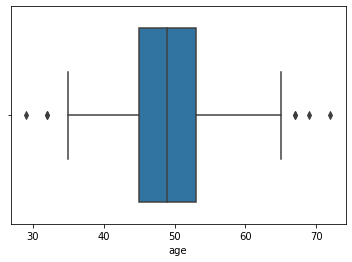

In [ ]:
#check for outliers using boxplot
sns.boxplot(x=voter_frame_02['age'])

In [ ]:
#get IQR values
Q1_02 = voter_frame_02.quantile(0.25)
Q3_02 = voter_frame_02.quantile(0.75)
IQR_02 = Q3_02 - Q1_02
print(Q1_02)
print(Q3_02)

age    45.0
Name: 0.25, dtype: float64
age    53.0
Name: 0.75, dtype: float64


In [ ]:
voter_frame_02.loc[voter_frame_02['age'] > 65]

,race,age
518,black2,67
713,hispanic2,67
799,hispanic2,72
801,white2,69


In [ ]:
voter_frame_02.loc[voter_frame_02['age'] < 33]

,race,age
240,hispanic2,32
370,other2,29
558,hispanic2,32


In [ ]:
#eliminate values that fall outside the IQR values
voter_frame_02 = voter_frame_02[~((voter_frame_02 < (Q1_02 - 1.5 * IQR_02)) |(voter_frame_02 > (Q3_02 + 1.5 * IQR_02))).any(axis=1)]
voter_frame_02.shape

(993, 2)

There are no null values in either data set to eliminate or replace. We only have two variables, so we will not need to eliminate any redundant data. Using information from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba, I used a boxplot visualization to identify the outliers that land outside of 1.5 times the interquartile range. However, I had to actually calculate the Q1 and Q4 values and check for the data outside of those values because a boxplot does not show if those dots have more than one piece of data. For example, the boxplot for Data Set 2 only shows 5 outliers, but there are actually 7 because 32 and 67 are repeated values. With this information, I can ensure that the amount of rows I am left with after elimination is correct. Depending on the data, you can choose whether to eliminate outliers or not. I decided to eliminate these outliers because I thought it would give me a better understanding of the data. Then, I was able to see that the amount of rows in each data set had dropped to 993 which is correct given there were 7 outliers in each data set.

# Models

### Data Set 1

In [ ]:
# Perform the ANOVA
stats.f_oneway(asian1, black1, hispanic1, other1, white1)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

The results of this one-way ANOVA show us that there is no significant difference between the means of each race because the F-statistic if too small and the p value is too large. In order to be statistically significant in this case the p value needs to be smaller than 0.05.

In [ ]:
# Get all race pairs
race_pairs1 = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs1.append((races1[race1], races1[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs1: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age_01[groups_01[race1]], 
                          voter_age_01[groups_01[race2]])) 

asian1 black1
Ttest_indResult(statistic=1.4723166654510063, pvalue=0.14259864916065687)
asian1 hispanic1
Ttest_indResult(statistic=0.7952576949464497, pvalue=0.42712310624411387)
asian1 other1
Ttest_indResult(statistic=0.023943564194904926, pvalue=0.9809494819541007)
asian1 white1
Ttest_indResult(statistic=1.7847665455760953, pvalue=0.07484331440702094)
black1 hispanic1
Ttest_indResult(statistic=-0.9779887872139286, pvalue=0.328687679434698)
black1 other1
Ttest_indResult(statistic=-1.537940275215305, pvalue=0.12568427083007871)
black1 white1
Ttest_indResult(statistic=0.1754225782292794, pvalue=0.860801405242227)
hispanic1 other1
Ttest_indResult(statistic=-0.8181367221979297, pvalue=0.41394624196541574)
hispanic1 white1
Ttest_indResult(statistic=1.5959271355589721, pvalue=0.11092241932285327)
other1 white1
Ttest_indResult(statistic=1.866874647450789, pvalue=0.06243863321791571)


Running a t-test on each pair of races confirms what we learned with the one-way ANOVA test; there is no significant difference between the means of any two races.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


group1,group2,meandiff,p-adj,lower,upper,reject
asian1,black1,-1.3353,0.5735,-3.8242,1.1535,False
asian1,hispanic1,-0.7593,0.9,-3.1315,1.6129,False
asian1,other1,-0.0264,0.9,-3.0202,2.9674,False
asian1,white1,-1.4184,0.4336,-3.6932,0.8564,False
black1,hispanic1,0.576,0.8145,-0.9362,2.0882,False
black1,other1,1.309,0.5494,-1.0622,3.6801,False
black1,white1,-0.0831,0.9,-1.4374,1.2713,False
hispanic1,other1,0.733,0.8996,-1.5154,2.9813,False
hispanic1,white1,-0.6591,0.4974,-1.7847,0.4665,False
other1,white1,-1.392,0.3912,-3.5374,0.7533,False


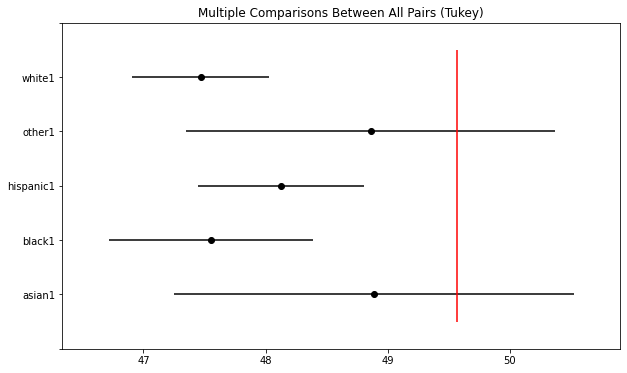

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age_01,     # Data
                          groups=voter_race_01,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

The Tukey Test shows that all the group pairs do not have a difference that is significant enough to reject the null hypothesis, which is: the two groups do not have significantly different means.

The plot illustrates that the means are not significantly different because the confidence intervals of all the groups overlap one another.

### Data Set 2

In [ ]:
# Perform the ANOVA
stats.f_oneway(asian2, black2, hispanic2, other2, white2)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

This ANOVA test shows us that the means are statistically significant because the p-value is very small (much smaller than 0.05).

In [ ]:
# Get all race pairs
race_pairs2 = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs2.append((races2[race1], races2[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs2: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age_02[groups_02[race1]], 
                          voter_age_02[groups_02[race2]])) 

asian2 black2
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian2 hispanic2
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian2 other2
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian2 white2
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black2 hispanic2
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black2 other2
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black2 white2
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic2 other2
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic2 white2
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other2 white2
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


We can run separate T-tests on each pair of races, and see that the p values are only statistically significant when the white group is part of the pair which implies that the white group is most likely causing the difference in the ANOVA test.

group1,group2,meandiff,p-adj,lower,upper,reject
asian2,black2,-0.8032,0.9,-3.4423,1.836,False
asian2,hispanic2,0.4143,0.9,-2.1011,2.9297,False
asian2,other2,-1.0645,0.8852,-4.2391,2.11,False
asian2,white2,1.9547,0.175,-0.4575,4.3668,False
black2,hispanic2,1.2175,0.2318,-0.386,2.821,False
black2,other2,-0.2614,0.9,-2.7757,2.253,False
black2,white2,2.7579,0.001,1.3217,4.194,True
hispanic2,other2,-1.4789,0.4391,-3.863,0.9053,False
hispanic2,white2,1.5404,0.004,0.3468,2.734,True
other2,white2,3.0192,0.0028,0.7443,5.2941,True


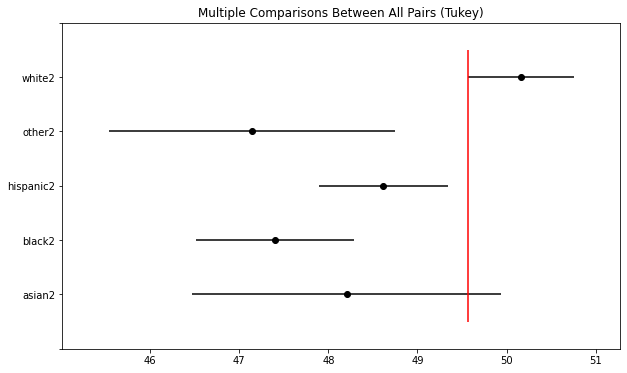

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age_02,     # Data
                          groups=voter_race_02,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

The Tukey Test shows there is a significant difference between the means for the black group and white group, hispanic group and white group, and other and white group. The other group pairs do not have a difference that is significant enough to reject the null hypothesis, which is: the two groups do not have significantly different means.

The plot shows each group's mean's confidence intervals. Since the white group has the most observations, so the confidence interval is less wide than the other groups.The asian group's line overlaps with the white group's line which illustrates that there is not a significant difference between the two groups' means. On the other hand, every other group's confidence interval does not overlap with the white group's because their group means are statistically different. This is just illustrating what we already learned from the one-way ANOVA and the Tukey test.

# Conclusions
Using the one-way ANOVA test, T-test, and Tukey test, we determined that the first data set did not have statistically different means among groups, and that the second data set did have statistically different means for three different group pairs. In other words, we failed to reject the null hypothesis for Data Set 1, and successfully rejected the null hypothesis for Data Set 2.<br>

All the tests provided some insight onto the difference between group means, but the Tukey Test was most helpful. The one-way ANOVA tells us if there is a significant difference among group means, but it does not tell us what group(s) is causing that difference. The t-test allows us to see which group(s) is causing the difference, but it is tedious and time-consuming to run a t-test on each separate pair of group means. The Tukey test automatically tests each seperate pair of group means using much less code, and the table even tells us explicitly whether we can reject the null hypothesis. <br>

In general, the one-way ANOVA test is a good way to get an idea of the means of the data you are working with, but it is not always enough to reject the null hypothesis. T-tests are great for smaller sets of data; for example, two separate groups rather than five. However, the Tukey test is the best for these two sets of data because it provides specific, reliable information in a quick and easy manner.